# Numerical simulation of short-circuit at the terminals of a synchronous generator in EMT

This notebook is a companion to the course [Control and Operation of Electric Power Systems](https://sps.cut.ac.cy/courses/een452/). It is based on material from the courses delivered by Prof. Thierry Van Cutsem at the University of Liege.

## Background

**Network represented by a simple Thevenin equivalent:**

- resistance $R_e$ and inductance $L_e$ in each phase
- no magnetic coupling between phases, for simplicity

**Machine:**

- only the field winding $f$ in the $d$ axis
- only one damper winding $q1$ in the $q$ axis
- rotor speed $\dot{\theta}_r$ assumed constant
  - the focus is on short-lasting electromagnetic transients
- constant excitation voltage $V_f$
  - it is assumed that the automatic voltage regulator hasn't time to react

<img src="img/sync_model.PNG" width="600">

### Network equations

\begin{alignat*}{3}
&v_{a}-e_{a}=R_{e} i_{a}+L_{e} \frac{d i_{a}}{d t} \quad &&\text{ with }\quad &&e_{a}=\sqrt{2} E \cos \left(\omega_{N} t+\theta\right) \\ 
&v_{b}-e_{b}=R_{e} i_{b}+L_{e} \frac{d i_{b}}{d t} \quad &&\text{ with }\quad &&e_{b}=\sqrt{2} E \cos \left(\omega_{N} t+\theta-\frac{2 \pi}{3}\right) \\ 
&v_{c}-e_{c}=R_{e} i_{c}+L_{e} \frac{d i_{c}}{d t} \quad &&\text{ with }\quad &&e_{c}=\sqrt{2} E \cos \left(\omega_{N} t+\theta-\frac{4 \pi}{3}\right)
\end{alignat*}

### Park equations

$$\left[\begin{array}{c}v_{d} \\ v_{q} \\ v_{o}\end{array}\right]=\mathcal{P}\left[\begin{array}{c}v_{a} \\ v_{b} \\ v_{c}\end{array}\right] \qquad\left[\begin{array}{c}i_{d} \\ i_{q} \\ i_{0}\end{array}\right]=\mathcal{P}\left[\begin{array}{c}i_{a} \\ i_{b} \\ i_{c}\end{array}\right]$$

where $$\mathcal{P}=\sqrt{\frac{2}{3}}\left[\begin{array}{ccc}\cos (\theta_{r}) & \cos \left(\theta_{r}-\frac{2 \pi}{3}\right) & \cos \left(\theta_{r}-\frac{4 \pi}{3}\right) \\ \sin (\theta_{r}) & \sin \left(\theta_{r}-\frac{2 \pi}{3}\right) & \sin \left(\theta_{r}-\frac{4 \pi}{3}\right) \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{array}\right]$$ is the Park transformation (power invariant version) and $\theta_r = \theta_r^o + \omega_N t$.

### Machine equations

$$\begin{aligned} \psi_{d} &=L_{d d} i_{d}+L_{d f} i_{f} \\ \psi_{q} &=L_{q q} i_{q}+L_{q q 1} i_{q 1} \\ \psi_{0} &=L_{o o} i_{o} \\ \psi_{f} &=L_{f f} i_{f}+L_{d f} i_{d} \\ \psi_{q 1} &=L_{q 1 q 1} i_{q 1}+L_{q q 1} i_{q} \\ v_{d} &=-R_{a} i_{d}-\dot{\theta}_{r} \psi_{q}-\frac{d \psi_{d}}{d t} \\ v_{q} &=-R_{a} i_{q}+\dot{\theta}_{r} \psi_{d}-\frac{d \psi_{q}}{d t} \\ v_{0} &=-R_{a} i_{0}-\frac{d \psi_{0}}{d t} \\ V_{f} &=R_{f} i_{f}+\frac{d \psi_{f}}{d t} \\ 0 &=R_{q 1} i_{q 1}+\frac{d \psi_{q 1}}{d t} \end{aligned}$$

### Remarks

- The model is made up of Differential-Algebraic Equations (DAEs)
- some of the variables and some of the equations could be eliminated but the additional computational effort of keeping all of them is negligible
- $\theta_r$ being known, the equations are linear with respect to the unknowns
- some coefficients in these equations vary with time.

### Equations in per unit

**At the stator (a, b, c):**

- base voltage $V_B$ = nominal RMS phase-to-neutral voltage (kV)
- base power $S_B$ = single-phase apparent power (MVA)
- base current $I_B = S_B/V_B$, base magnetic flux $\psi_B = V_B/\omega_N$, etc.

**In each of the Park winding (d, q, o):**

- base voltage = $V_B$
- base power = $S_B$
- base current = $I_B = S_B/V_B$, base flux = $\psi_B = V_B/\omega_N$, etc.

The rotor variables and equations are also transformed in pu; the system is not detailed here.

**After passing in per unit:**

- $\dot{\theta}_r=1$ pu
- each time derivative is multiplied by $1/\omega_N$, since we keep the time t in seconds (not in pu)


**The equations become:**

$$\begin{aligned} \frac{1}{\omega_{N}} \frac{d i_{a}}{d t} &=-\frac{R_{e}}{L_{e}} i_{a}+\frac{1}{L_{e}} v_{a}-\frac{1}{L_{e}} e_{a} \\ \frac{1}{\omega_{N}} \frac{d i_{b}}{d t} &=-\frac{R_{e}}{L_{e}} i_{b}+\frac{1}{L_{e}} v_{b}-\frac{1}{L_{e}} e_{b} \\ \frac{1}{\omega_{N}} \frac{d i_{c}}{d t} &=-\frac{R_{e}}{L_{e}} i_{c}+\frac{1}{L_{e}} v_{c}-\frac{1}{L_{e}} e_{c} \\ 0 &=\sqrt{\frac{2}{3}}\left[\cos \left(\theta_{r}\right) v_{a}+\cos \left(\theta_{r}-\frac{2 \pi}{3}\right) v_{b}+\cos \left(\theta-\frac{4 \pi}{3}\right) v_{c}\right]-v_{d} \\ 0 &=\sqrt{\frac{2}{3}}\left[\sin \left(\theta_{r}\right) v_{a}+\sin \left(\theta_{r}-\frac{2 \pi}{3}\right) v_{b}+\sin \left(\theta_{r}-\frac{4 \pi}{3}\right) v_{c}\right]-v_{q} \\ 0 &=\frac{1}{\sqrt{3}}\left(v_{a}+v_{b}+v_{c}\right)-v_{o} \\ 0 &=\sqrt{\frac{2}{3}}\left[\cos \left(\theta_{r}\right) i_{a}+\cos \left(\theta_{r}-\frac{2 \pi}{3}\right) i_{b}+\cos \left(\theta_{r}-\frac{4 \pi}{3}\right) i_{c}\right]-i_{d} \\ 0 &=\sqrt{\frac{2}{3}}\left[\sin \left(\theta_{r}\right) i_{a}+\sin \left(\theta_{r}-\frac{2 \pi}{3}\right) i_{b}+\sin \left(\theta_{r}-\frac{4 \pi}{3}\right) i_{c}\right]-i_{q} \\ 0 &=\frac{1}{\sqrt{3}}\left(i_{a}+i_{b}+i_{c}\right)-i_{o} \\ 0 &=L_{d d} i_{d}+L_{d f} i_{f}-\psi_{d} \\ 0 &=L_{q q} i_{q}+L_{q q 1} i_{q 1}-\psi_{q} \\ 0 &=L_{f f} i_{f}+L_{d f} i_{d}-\psi_{f} \\ 0 &=L_{q 1 q 1} i_{q 1}+L_{q q 1} i_{q}-\psi_{q 1} \\ 0 &=L_{o o} i_{o}-\psi_{o} \\ \frac{1}{\omega_{N}} \frac{d \psi_{d}}{d t} &=-R_{a} i_{d}-\psi_{q}-v_{d} \\ \frac{1}{\omega_{N}} \frac{d \psi_{q}}{d t} &=-R_{a} i_{q}+\psi_{d}-v_{q} \\ \frac{1}{\omega_{N}} \frac{d \psi_{f}}{d t} &=-R_{f} i_{f}+V_{f} \\ \frac{1}{\omega_{N}} \frac{d \psi_{q 1}}{d t} &=-R_{q 1} i_{q 1} \\ \frac{1}{\omega_{N}} \frac{d \psi_{0}}{d t} &=-R_{a} i_{o}-v_{o} \end{aligned}$$

### Variable - equations balance

- 19 variables : $v_a,\ v_b,\ v_c,\ i_a,\ i_b,\ i_c,\ v_d,\ v_q,\ v_o,\ i_d,\ i_q,\ i_o,\ \psi_d,\ \psi_q,\ \psi_o,\ \psi_f ,\ \psi_{q1},\ i_f,\ i_{q1}$
- 19 equations

### In compact form:

$$\begin{aligned}\left(1 / \omega_{N}\right) \dot{\boldsymbol x} &= \boldsymbol A_{x x} \boldsymbol x+\boldsymbol A_{x y} \boldsymbol y+\boldsymbol u_{x} \\ \boldsymbol 0 &=\boldsymbol A_{y x} \boldsymbol x+\boldsymbol A_{y y} \boldsymbol y+\boldsymbol u_{y} \end{aligned}$$

where

$\begin{aligned} \boldsymbol x &=\left[i_{a}\ i_{b}\ i_{c}\ \psi_{d}\ \psi_{q}\ \psi_{f}\ \psi_{q 1}\ \psi_{o}\right]^{T} \\ \boldsymbol y &=\left[v_{a}\ v_{b}\ v_{c}\ v_{d}\ v_{q}\ v_{0}\ i_{d}\ i_{q}\ i_{o}\ i_{f}\ i_{q 1}\right]^{T} \\ \boldsymbol{u}_{x}&=\left[-\frac{e_{a}}{L_{e}}\ -\frac{e_{b}}{L_{e}}\ -\frac{e_{c}}{L_{e}}\  0\ 0\  \mathrm{~V}_{f}\  0\ 0\right]^{T} \\ \boldsymbol{u}_{y}&=\left[0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0\right]^{T} \end{aligned}$

### Numerical solution of the DAEs

To simulate the equations above over a time-horizon $T$, we need to discretise them and solve with an integration method. A popular numerical integration formula is the _Trapezoidal Method_:

$$x_{k+1}=x_k+\frac{h}{2}(\dot{x}_{k+1}+\dot{x}_k)$$

Replacing in the compact form, gives:

$$\boldsymbol{x}_{k+1}=\boldsymbol{x}_{k}+\frac{h}{2} \omega_{N} \boldsymbol{A}_{x x} \boldsymbol{x}_{k+1}+\frac{h}{2} \omega_{N} \boldsymbol{A}_{x y} \boldsymbol{y}_{k+1}+\frac{h}{2} \omega_{N} \boldsymbol{u}_{x k+1}+\frac{h}{2} \dot{\boldsymbol{x}}_{k}$$

Dividing by $\frac{h\omega_N}{2}$ and rearranging the various terms:

$$\left[\boldsymbol{A}_{x x}-\frac{2}{h \omega_{N}} \boldsymbol{I}\right] \boldsymbol{x}_{k+1}+\boldsymbol{A}_{x y} \boldsymbol{y}_{k+1}=-\frac{2}{h \omega_{N}} \boldsymbol{x}_{k}-\frac{1}{\omega_{N}} \dot{\boldsymbol{x}}_{k}-\boldsymbol{u}_{x k+1}$$

where $I$ is the unit matrix of same dimension as $x$.

From the compact form, we also get:

$$\boldsymbol{A}_{y x} \boldsymbol{x}_{k+1}+\boldsymbol{A}_{y y} \boldsymbol{y}_{k+1}=-\boldsymbol{u}_{yk+1}$$

Grouping the equations, the linear system to solve at each time step is:

$$\left[\begin{array}{cc}\boldsymbol{A}_{x x}-\frac{2}{h \omega_{N}} \boldsymbol{I} & \boldsymbol{A}_{x y} \\ \boldsymbol{A}_{y x} & \boldsymbol{A}_{y y}\end{array}\right]\left[\begin{array}{c}\boldsymbol{x}_{k+1} \\ \boldsymbol{y}_{k+1}\end{array}\right]=\left[\begin{array}{c}-\frac{2}{h \omega_{N}} \boldsymbol{x}_{k}-\frac{1}{\omega_{N}} \dot{\boldsymbol{x}}_{k}-\boldsymbol{u}_{x k+1} \\ -\boldsymbol{u}_{y k+1}\end{array}\right]$$

## Case study

### Network and machine data

- $f_N=50$ Hz
- $L_e=0.2$ pu, $R_e=0.01$ pu
- $R_a=0.005$ pu
- $L_{dd} = 2.4$ pu, $L_{df}=2.2$ pu, $L_{ff}=2.42$ pu
- $L_{qq} = 2.4$ pu, $L_{qq1}=2.2$ pu, $L_{q1q1}=2.2512$ pu
- $R_f = 0.0011$ pu, $R_{q1}=0.0239$ pu
- $L_{00}=0.1$ pu


### Initial operating point

- $P=0.5$ pu
- $Q=0.1$ pu
- $\underline{V}_a=1.0\angle{0}$ pu

### Simulation case study

A three-phase short-circuit is simulated by setting E to zero at $t = 0.05$ s.

### Important remarks

The fault is not cleared in order to show the various time constants present in the current evolution.
However, in practice:

- the fault must be cleared fast enough, e.g. after $5 - 10$ cycles ($0.1 - 0.2$ s)
- beyond that time, the model is no longer valid:
  - rotor speed would not remain constant
  - $v_f$ would be adjusted by the Automatic Voltage Regulator
  - etc.

## Main simulation procedure

### Linearization function

The function linmodel defines the procedure to calculate the matrix $A$ of the model and the input vector $u$.

In [1]:
function [A,u] = linmodel(t) 

global wN Re Le Ldd Ldf Lff Lqq Lqq1 Lq1q1 Loo Ra Rf Rq1 theta0 phasE Vf ;

A=zeros(19,19) ;
theta=theta0+wN*t ;

A(1,1)  = -Re/Le ;   % d ia/dt
A(1,4)  = 1/Le ;
A(2,2)  = -Re/Le ;   % d ib/dt
A(2,5)  = 1/Le ;
A(3,3)  = -Re/Le ;   % d ic/dt
A(3,6)  = 1/Le ;
A(4,4)  = (sqrt(2)/3)*cos(theta) ;         % vd 
A(4,5)  = (sqrt(2)/3)*cos(theta-2*pi/3) ;
A(4,6)  = (sqrt(2)/3)*cos(theta+2*pi/3) ;
A(4,7)  = -1 ;
A(5,4)  = (sqrt(2)/3)*sin(theta) ;         % vq 
A(5,5)  = (sqrt(2)/3)*sin(theta-2*pi/3) ;
A(5,6)  = (sqrt(2)/3)*sin(theta+2*pi/3) ;
A(5,8)  = -1 ; 
A(6,4)  = 1/3 ;                            % vo
A(6,5)  = 1/3 ; 
A(6,6)  = 1/3 ; 
A(6,9)  = -1 ;
A(7,1)  = (sqrt(2)/3)*cos(theta) ;         % id 
A(7,2)  = (sqrt(2)/3)*cos(theta-2*pi/3) ;
A(7,3)  = (sqrt(2)/3)*cos(theta+2*pi/3) ;
A(7,10) = -1 ;
A(8,1)  = (sqrt(2)/3)*sin(theta) ;         % iq 
A(8,2)  = (sqrt(2)/3)*sin(theta-2*pi/3) ;
A(8,3)  = (sqrt(2)/3)*sin(theta+2*pi/3) ;
A(8,11) = -1 ; 
A(9,1)  = 1/3 ;     % io
A(9,2)  = 1/3 ; 
A(9,3)  = 1/3 ;
A(9,12) = -1 ;
A(10,10)= Ldd ;     % psid
A(10,13)= Ldf ;
A(10,15)= -1 ;
A(11,11)= Lqq ;     % psiq
A(11,14)= Lqq1 ;
A(11,16)= -1 ; 
A(12,13)= Lff ;     % psif
A(12,10)= Ldf ;
A(12,17)= -1 ;
A(13,14)= Lq1q1 ;   % psiq1
A(13,11)= Lqq1 ;
A(13,18)= -1 ;
A(14,12)= Loo ;     % psio
A(14,19)= -1 ;
A(15,16)= -1 ;      % d psid/dt
A(15,7) = -1 ;
A(15,10)= -Ra ;
A(16,15)=  1 ;      % d psiq/dt
A(16,8) = -1 ;
A(16,11)= -Ra ;
A(17,13)= -Rf ;     % d psif/dt
A(18,14)= -Rq1 ;    % d psiq1/dt
A(19,12)= -Ra ;     % d psio/dt
A(19,9) = -1 ;

% Short-circuit application on the terminals of the sync. machine
if t<= 0.05  || t>= 99
    ea=sqrt(2)*abs(phasE)*cos(wN*t+angle(phasE)) ;
    eb=sqrt(2)*abs(phasE)*cos(wN*t+angle(phasE)-2*pi/3) ;
    ec=sqrt(2)*abs(phasE)*cos(wN*t+angle(phasE)+2*pi/3) ;
else
    ea=0. ;
    eb=0. ;
    ec=0. ;
end

u= [ -ea/Le -eb/Le -ec/Le 0 0 0 0 0 0 0 0 0 0 0 0 0 Vf 0 0]' ; % Output vector u

endfunction

### Simulation procedure

Below is the main simulation procedure:

In [2]:
global wN Re Le Ldd Ldf Lff Lqq Lqq1 Lq1q1 Loo Ra Rf Rq1 theta0 phasE Vf ;

j=sqrt(-1) ;

% --------------- DATA ---------------
% network and operating point
% P and Q are in per unit on a single-phase base power (three-phase model)

Xe=0.20 ;
Re=0.01 ;
P=0.5 ;
Q=0.1 ;
V=1 ;

% machine parameters

Ra=0.005 ;
Xd=2.4 ;
Xq=2.4 ;
Xl=0.2 ;
Xpd=0.40 ;
Xpq=0.25 ;
Loo=0.1 ;
fN=50. ;
Tpdo_s=7. ;
Tpqo_s=0.3 ;

% time step size and simulation interval

h= 100e-06 ;
Tsim= 3 ;

% -------------- END OF DATA --------------

% derived parameters

wN=2*pi*fN ;
TB=1/(2*pi*fN) ;
Le=Xe ;
Ldd=Xd ;
Ldf=Xd-Xl ;
Lff=Ldf^2/(Xd-Xpd) ;
Tpdo=Tpdo_s/TB ;
Rf=Lff/Tpdo ;
Lqq=Xq ;
Lqq1=Xq-Xl ;
Lq1q1=Lqq1^2/(Xq-Xpq) ;
Tpqo=Tpqo_s/TB ;
Rq1=Lq1q1/Tpqo ;

% allocate space to store trajectory

nbsteps=ceil(Tsim/h) ;
time=zeros(1,nbsteps+1) ;
xhist=zeros(17,nbsteps+1) ;

% initialization of state variables

phasI=(P-j*Q)/V ;             % network voltages and currents
va=sqrt(2)*V ;
vb=sqrt(2)*V*cos(-2*pi/3) ;
vc=sqrt(2)*V*cos( 2*pi/3) ;
ia=sqrt(2)*abs(phasI)*cos(angle(phasI)) ;
ib=sqrt(2)*abs(phasI)*cos(angle(phasI)-2*pi/3) ;
ic=sqrt(2)*abs(phasI)*cos(angle(phasI)+2*pi/3) ;
phasE=V-(Re+j*Xe)*phasI ;

phi=angle(V+Ra*phasI+j*Xq*phasI);     % machine
theta0=phi+pi/2 ;

id=(sqrt(2)/3)*(cos(theta0)*ia+cos(theta0-2*pi/3)*ib+cos(theta0+2*pi/3)*ic) ;
iq=(sqrt(2)/3)*(sin(theta0)*ia+sin(theta0-2*pi/3)*ib+sin(theta0+2*pi/3)*ic) ;
io=0 ;
vd=(sqrt(2)/3)*(cos(theta0)*va+cos(theta0-2*pi/3)*vb+cos(theta0+2*pi/3)*vc) ;
vq=(sqrt(2)/3)*(sin(theta0)*va+sin(theta0-2*pi/3)*vb+sin(theta0+2*pi/3)*vc) ;
vo=0 ;

psid= vq+Ra*iq ;
psiq=-vd-Ra*id ;
psio=0 ;
ifd=(psid-Ldd*id)/Ldf ;
psif=Lff*ifd+Ldf*id ;
Vf=Rf*ifd ;
iq1=0 ;
psiq1=Lqq1*iq ;

% identify differential and algebraic states
% note: the i-th differential equation is  d x(i)/dt = ...

dif= [1 2 3 15 16 17 18 19] ;
alg= [4 5 6 7 8 9 10 11 12 13 14] ;

% initialisation of integration

time(1)=0 ;
%  1  2  3  4  5  6  7  8  9  10 11 12 13  14  15    16   17    18   19
x=[ia ib ic va vb vc vd vq vo id iq io ifd iq1 psid psiq psif psiq1 psio]' ; 
xhist(1:19,1)=x ;

[A,u]=linmodel(0) ;

% integration method

for k=1:nbsteps
    c= A*x + u ;  
    
    t=k*h ;
    time(k+1)=t ;
    
    [A,u]=linmodel(t) ;
    
    b= -u ;
    b(dif)= b(dif)- (2/h/wN)*x(dif) - c(dif) ;
    
    M= A;
    M(dif,dif)= M(dif,dif) - (2/h/wN)*eye(size(dif,2)) ;
    x= M\b ;
    xhist(1:19,k+1)=x ;
    
end

## Analysis of results and discussion

### Voltage on phase a

- decrease of AC voltage magnitude under the effect of the fault
- presence of a residual voltage due to some emf inside the generator
- remark:
  - such an emf does not exist in generators connected to the network through power electronic interfaces (dispersed generation in MV distribution grid)
  - the latter do not participate to the short-circuit capacity!

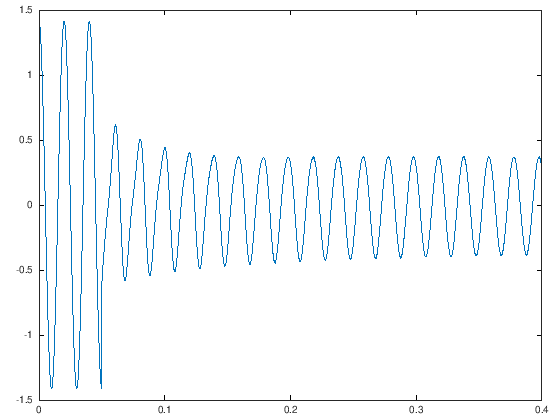

In [3]:
plot(time(1:4000),xhist(4,1:4000))

### Current on phase a

- increase of amplitude of alternating current under the effect of the fault
- the envelop of the current wave varies with time (more details in the sequel)
- presence of a small aperiodic or unidirectional or DC component
  - typical of transients in an RL circuit due to switchings
  - much more visible in the other two phases

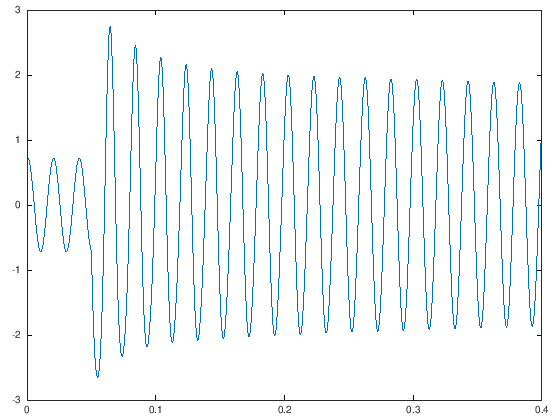

In [4]:
plot(time(1:4000),xhist(1,1:4000))

### Current on phases b and c

- the magnitude of the aperiodic components decrease with a time constant $\approxeq$ 0.15 s (in this example)
- the aperiodic components are not the same in all three phases, because the rotor is not in the same position with respect to each stator winding
- once they have vanished, the three phase currents become again sinusoidal and balanced

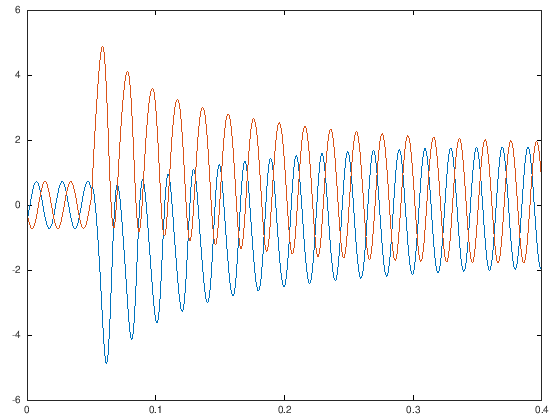

In [5]:
plot(time(1:4000),xhist(2,1:4000))
hold on
plot(time(1:4000),xhist(3,1:4000))

### Current on phase a -- long-term

- the magnitude of the alternating component of ia shows two time constants:
  - a short one, lasting a few cycles, resulting in a slightly higher initial amplitude of the current: caused by damper winding q1
  - a much longer one ($\approxeq$ 1.5 s in this example): caused by field winding f
- the current that the breakers have to interrupt is much higher than the one which would prevail in steady-state!
- the machine behaves initially as if it had a smaller internal reactance

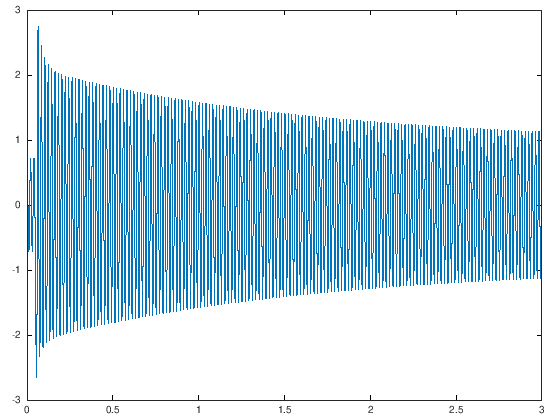

In [6]:
plot(time,xhist(1,:))

### Magnetic fields

The alternating components of the stator currents $i_a$, $i_b$ and $i_c$
- are shifted by $\pm 2\pi/3$ rad. They create a magnetic field $H_{AC}$ which rotates at the angular speed $\omega_N$
- this field is fixed with respect to the rotor windings
- under the effect of the fault, the amplitude if $i_a$, $i_b$ and $i_c$ increases significantly. So does the magnetic field $H_{AC}$
- this induces aperiodic current components in the rotor windings.

The aperiodic components of the stator currents $i_a$, $i_b$ and $i_c$
- create a magnetic field $H_{AC}$ which is fixed with respect to the stator
- hence it rotates at angular speed $\omega_N$ with respect to the rotor windings
- this induces alternating components of angular frequency $\omega_N$ in the rotor windings

### Field winding flux

- the flux $\psi_f$ in the field winding changes very little in spite of the large increase of stator currents!
- large "magnetic inertia" due to the long time constant $L_{ff}/R_f$ (= 7 s in this example)

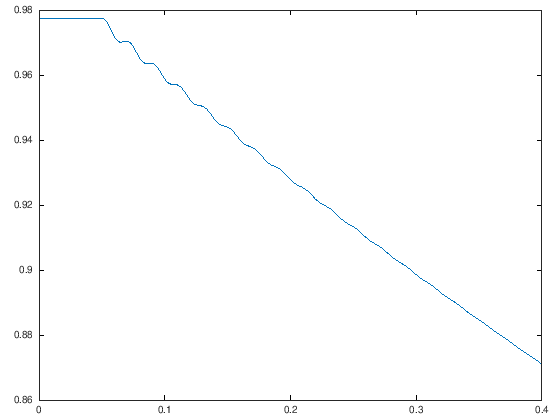

In [7]:
plot(time(1:4000),xhist(17,1:4000))

### Field current

- Lenz law: additional current components appear in the field winding in order to keep $\psi_f$ (almost) constant
- the oscillatory component is due to the magnetic field $H_{DC}$
  - check: time constant of decay = time constant of aperiodic component of stator currents ≃ 0.15 s
- the aperiodic component is due to the magnetic field $H_{AC}$
  - time constant ≃ 1.5 s

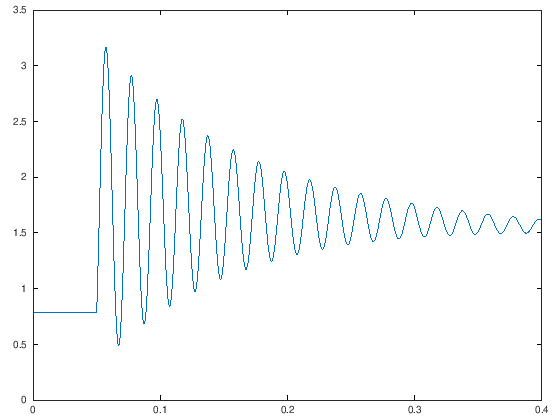

In [8]:
plot(time(1:4000),xhist(13,1:4000))

### Flux in damper winding $q1$

- the flux in the damper winding $q1$ is comparatively more "volatile"
- indeed, the field and the damper windings are constructively very different: field coil vs. damper bars in rotor slots

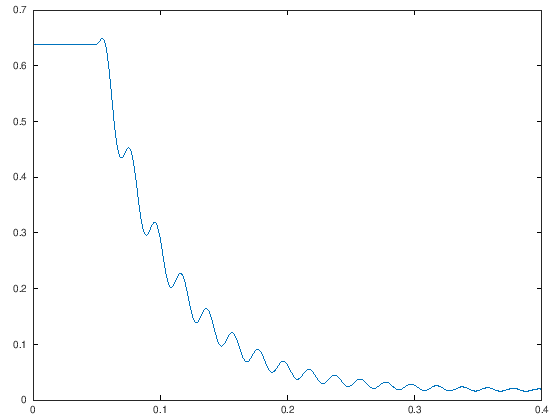

In [9]:
plot(time(1:4000),xhist(18,1:4000))

### Current in damper winding $q1$

- the damper current $i_{q1}$ has a zero initial (and final) value
- the oscillatory component is due to the magnetic field $H_{DC}$
- the aperiodic component decreases much faster than the aperiodic component of $i_f$
- it corresponds to the initial, fast decaying, increment of the stator current amplitude

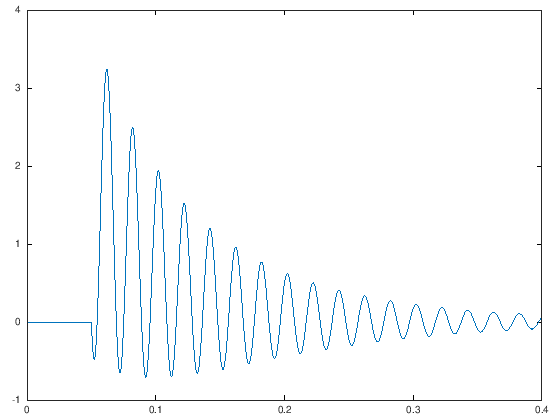

In [10]:
plot(time(1:4000),xhist(14,1:4000))

### Currents $i_d$ and $i_q$

- the oscillatory component of $i_d$ (resp. $i_q$) corresponds to the oscillatory component of $i_f$ (resp. $i_{q1}$) which lies on the same axis
- it can be shown that $i_q$ goes to almost zero due to the predominantly inductive nature of the short-circuit
- the aperiodic component of $i_d$ evolves with the long time constant observed for the aperiodic component of $i_f$

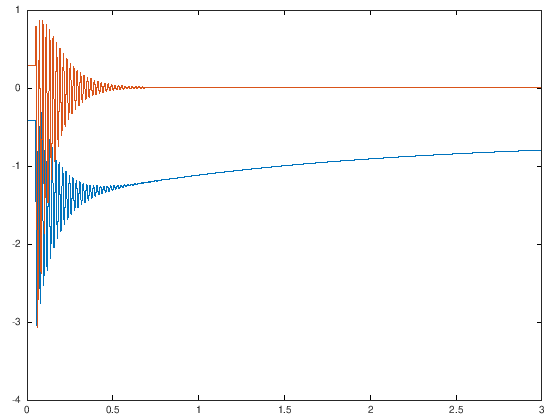

In [11]:
plot(time(:),xhist(10,:))
hold on
plot(time(:),xhist(11,:))

### Currents $\psi_d$ and $\psi_q$

- fluxes $\psi_d$ and $\psi_q$ in Park windings vary comparatively much faster
- since $i_q$ and $i_{q1}$ tend to zero, so does $\psi_q$

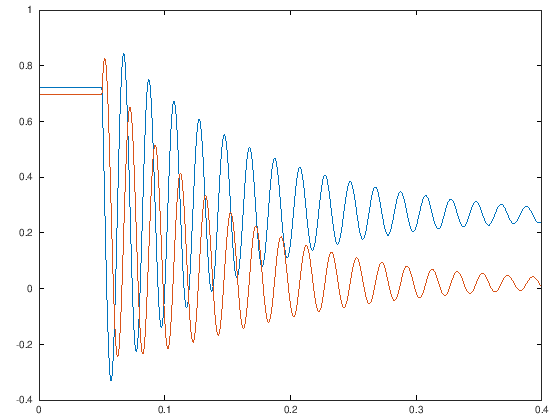

In [12]:
plot(time(1:4000),xhist(15,1:4000))
hold on
plot(time(1:4000),xhist(16,1:4000))